In [1]:
import pandas as pd

In [56]:
import matplotlib.pyplot as plt

In [54]:
from wordcloud import WordCloud

In [2]:
file = "no_retweet100k.csv"

In [30]:
# df = pd.read_csv(file, error_bad_lines=False)

In [8]:
len(df)

102325

In [10]:
df.head()

tweet
0  Don't waste your precious time watching Trump'...
1  Waiting for spectator index and Norbert Elekes...
2  DOES IT GET ANY STUPIDER? Trump's response to ...
3       He means to kill us. https://t.co/DmI4VVcuOX
4       Damn piers you are savage.. lovely write up.

In [24]:
def remove_url(string):
    """
    Gets rid of URLS so the word cloud doesn't contain them.
    """
    string = str(string)
    wordlist = string.split()
    text = ' '.join(word for word in wordlist if not 'http' in word)
    return text.lower()

In [13]:
df = df.tweet.apply(lambda x: str(x))

In [79]:
df.tweet.iloc[100000]

'@Robert_684 @neontaster I am pretty most experts on oil prices got caught with their pants down and anyone that says otherwise is lying.\nThis is literally unprecedented.'

In [84]:
no_url = df['tweet'].apply(remove_url)

In [85]:
no_url.head()

0    don't waste your precious time watching trump'...
1    waiting for spectator index and norbert elekes...
2    does it get any stupider? trump's response to ...
3                                 he means to kill us.
4         damn piers you are savage.. lovely write up.
Name: tweet, dtype: object

In [86]:
len(no_url)

102325

## First 102,325 unique tweets

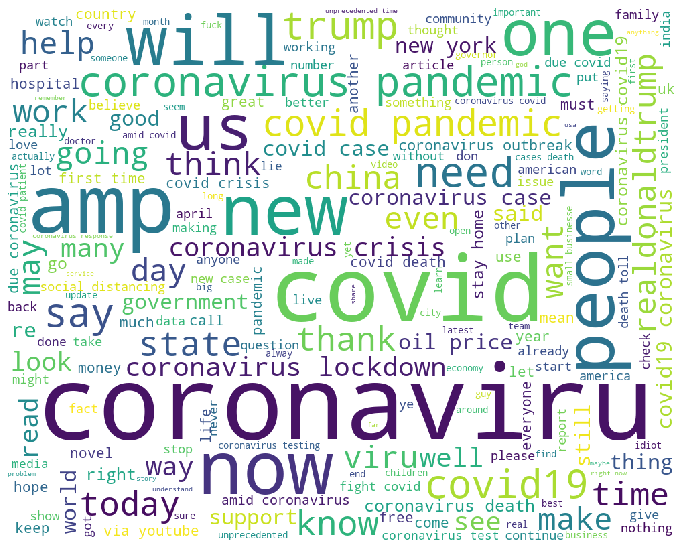

In [94]:
plt.figure(figsize=(12,10))
wordcloud = WordCloud(background_color='white',
                     width=1000, 
                     height=800).generate(' '.join(no_url))
plt.imshow(wordcloud)
plt.axis('off')
plt.show(wordcloud)

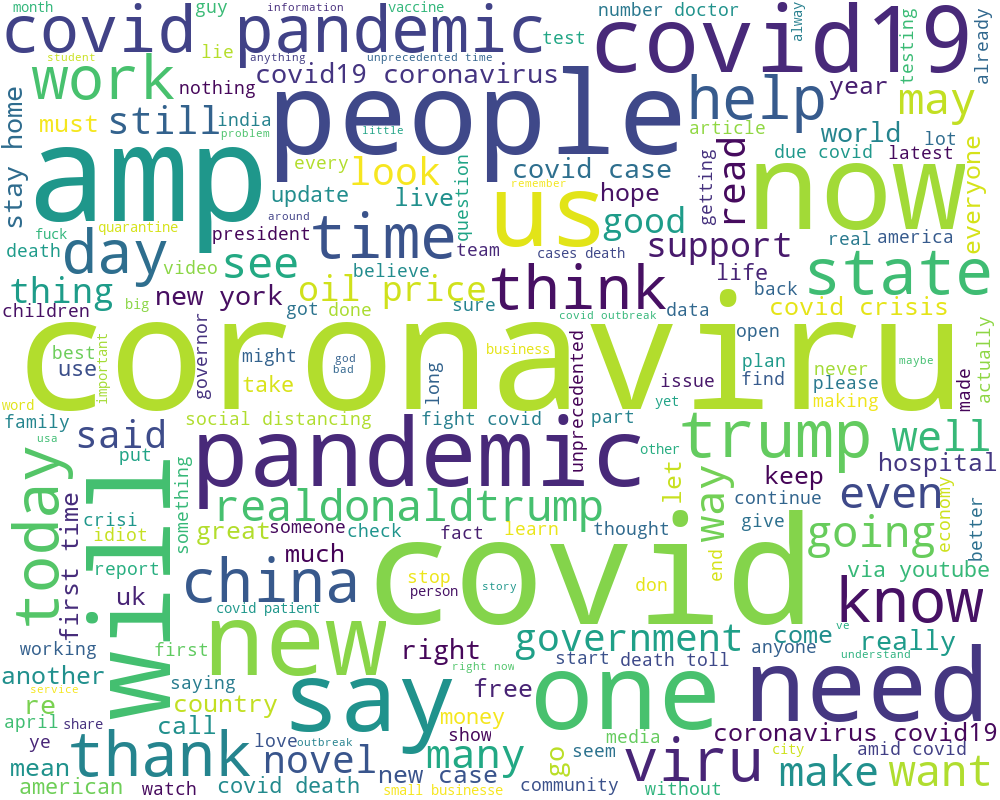

In [111]:
WordCloud.to_image(wordcloud)

In [100]:
no_url[10001]

'2 days no cases in nl. it’s really 3rd day apr 14 also. but they’re only testing 1% of pop. so prob lots more coro…'

In [115]:
wordlist = ['coronaviru', 'coronavirus', 'covid', 'covid19', 'the', 'and',
           'amp', 'of', 'to', 'they', 'are', 'we', 'have', 'this', 'it', 'is',
           'by', 'on', 'than', 'which', 'me', 'not', 'because', 'then', 'where']

In [129]:
no_corona = no_url.apply(lambda x: ' '.join(word for word in x.split() if not word in wordlist))

## Taking out coronavirus

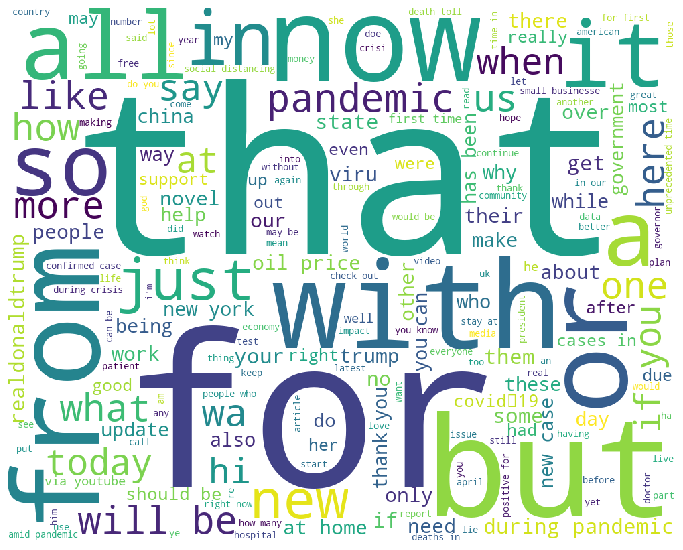

In [116]:
plt.figure(figsize=(12,10))
wordcloud = WordCloud(background_color='white',
                     width=1000, 
                     height=800, stopwords=wordlist).generate(' '.join(no_corona))
plt.imshow(wordcloud)
plt.axis('off')
plt.show(wordcloud)

In [104]:
no_corona

0         don't waste your precious time watching trump'...
1         waiting for spectator index and norbert elekes...
2         does it get any stupider? trump's response to ...
3                                      he means to kill us.
4              damn piers you are savage.. lovely write up.
                                ...                        
102320    we stand with our colleagues at @northwesternu...
102321    @aoc just when i thought you couldn’t possibly...
102322                                            exactly!!
102323    @abc the protestors are saying that the covid-...
102324    @sheriffed_hcso @miguelcalatayu2 as the covid-...
Name: tweet, Length: 102325, dtype: object

## Let's bring in some stopwords so we can pull those out as well as coronavirus words

In [119]:
from nltk.corpus import stopwords

In [142]:
stopword_list = stopwords.words('english')

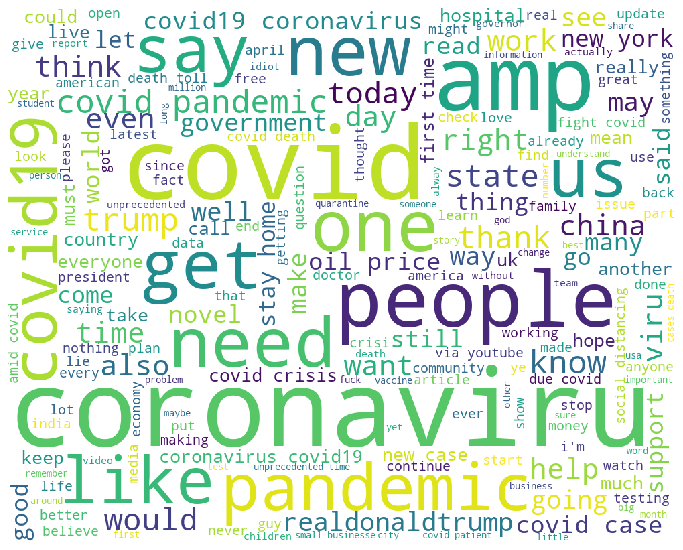

In [121]:
plt.figure(figsize=(12,10))
wordcloud = WordCloud(background_color='white',
                     width=1000, 
                     height=800, stopwords=stopword_list).generate(' '.join(no_corona))
plt.imshow(wordcloud)
plt.axis('off')
plt.show(wordcloud)

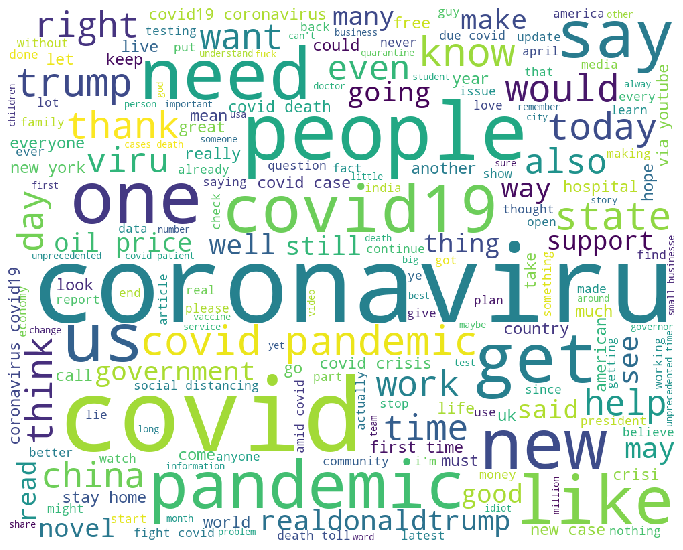

In [124]:
plt.figure(figsize=(12,10))
wordcloud = WordCloud(background_color='white',
                     width=1000, 
                     height=800, stopwords=stopword_list).generate(' '.join(no_corona))
plt.imshow(wordcloud)
plt.axis('off')
plt.show(wordcloud)

In [146]:
more_stopwords = stopword_list.append('covid')

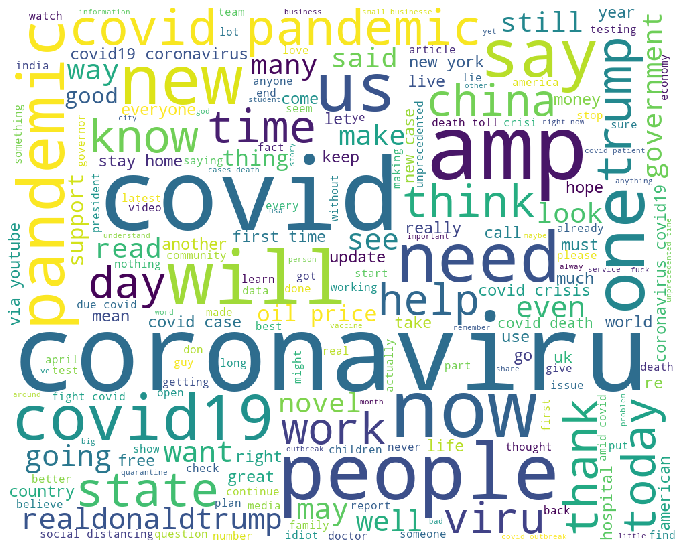

In [132]:
plt.figure(figsize=(12,10))
wordcloud = WordCloud(background_color='white',
                     width=1000, 
                     height=800, stopwords=more_stopwords).generate(' '.join(no_corona))
plt.imshow(wordcloud)
plt.axis('off')
plt.show(wordcloud)

In [123]:
# 'amp' shows up all the time in lieu of &
stopword_list.append('amp')

In [139]:
more_stopwords.append('covid19')

## Wordcloud without coronavirus, etc

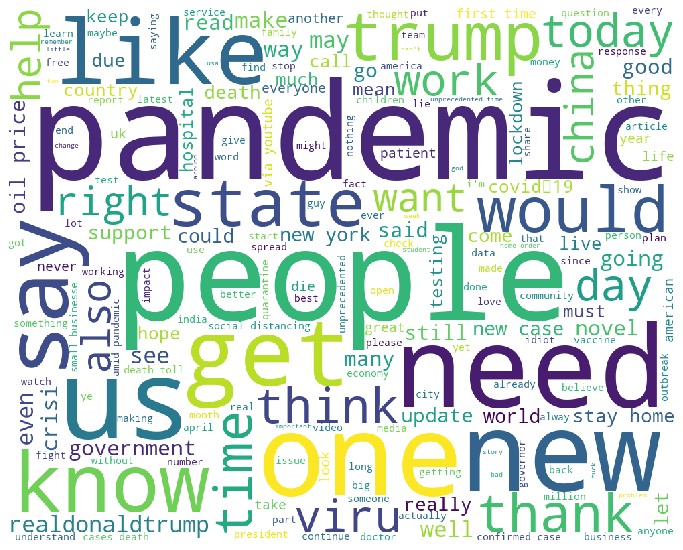

In [150]:
# Stopwords include 'coronavirus', 'covid19', and 'covid'
plt.figure(figsize=(12,10))
wordcloud = WordCloud(background_color='white',
                     width=1000, 
                     height=800, stopwords=stopword_list).generate(' '.join(no_corona))
plt.imshow(wordcloud)
plt.axis('off')
plt.show(wordcloud)

## Pulling only tweets with location "Nigeria"

In [163]:
file = "nigeria.csv"

In [205]:
# nigeria = pd.read_csv(file, error_bad_lines=False)

In [165]:
nigeria

tweet
0    COVID-19 Preventive and Safety Measures.\n\n#A...
1    COVID-19 Response Prayers – Day 15 https://t.c...
2    We live in a very dangerous world today. There...
3    Nigerians react as Gov Yahaya Bello says Kogi ...
4    Testing should be ramped up with immediate eff...
..                                                 ...
680  @NCDCgov \nGERMANY, US, UK, FRANCE are suspect...
681  Remdesivir also showed promise in rhesus macaq...
682                             @Zaddy224 Try COVID-19
683  Minister delivers Covid-19 palliatives, flags-...
684  Germany sends China £130bn bill for ‘coronavir...

[685 rows x 1 columns]

### Note what happens when URLs aren't cleared out first. 'https', etc.

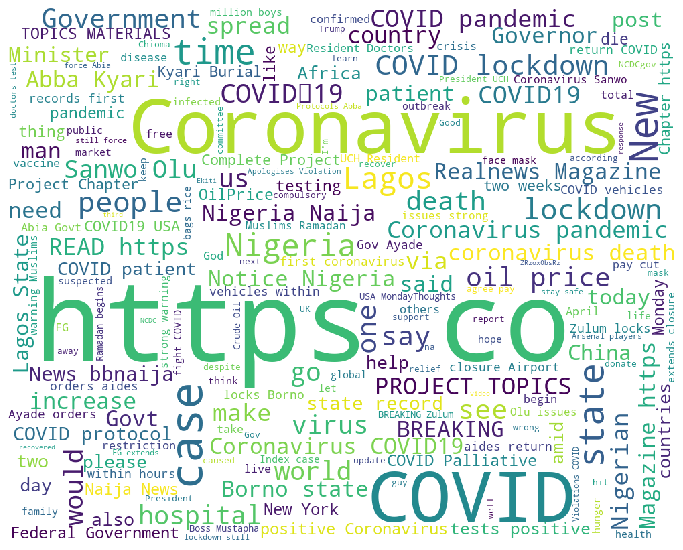

In [169]:
plt.figure(figsize=(12,10))
wordcloud = WordCloud(background_color='white',
                     width=1000, 
                     height=800, stopwords=stopword_list).generate(' '.join(nigeria['tweet']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show(wordcloud)

In [167]:
len(nigeria)

685

In [168]:
nigeria.head()

tweet
0  COVID-19 Preventive and Safety Measures.\n\n#A...
1  COVID-19 Response Prayers – Day 15 https://t.c...
2  We live in a very dangerous world today. There...
3  Nigerians react as Gov Yahaya Bello says Kogi ...
4  Testing should be ramped up with immediate eff...

In [170]:
# Remove URLs
nigeria = nigeria['tweet'].apply(remove_url)

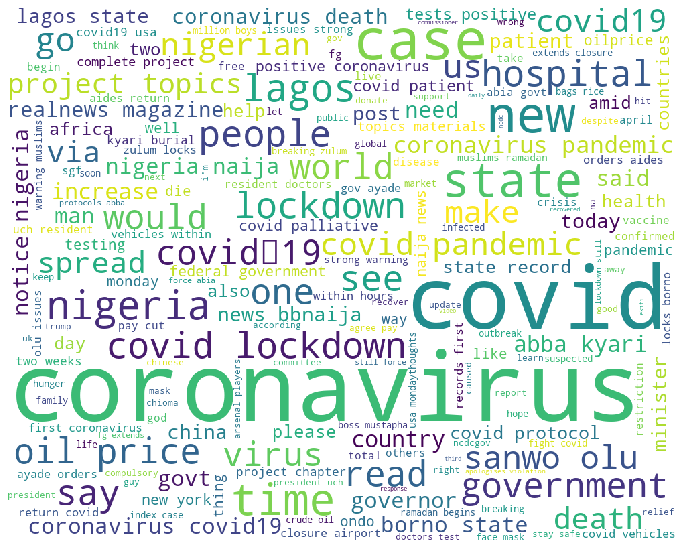

In [172]:
plt.figure(figsize=(12,10))
wordcloud = WordCloud(background_color='white',
                     width=1000, 
                     height=800, stopwords=stopword_list).generate(' '.join(nigeria))
plt.imshow(wordcloud)
plt.axis('off')
plt.show(wordcloud)

## Location is "Texas"

In [173]:
file = "texas.csv"

In [188]:
# texas = pd.read_csv(file, error_bad_lines=False)

In [178]:
len(texas)

1580

In [179]:
texas = texas['tweet'].apply(remove_url)

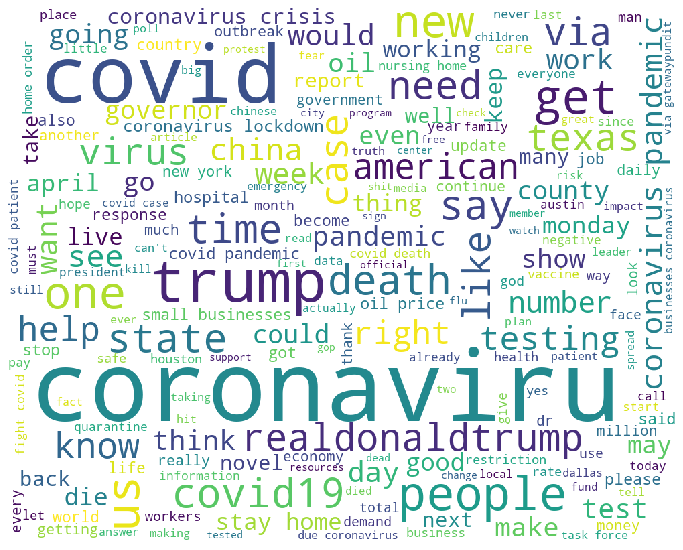

In [180]:
plt.figure(figsize=(12,10))
wordcloud = WordCloud(background_color='white',
                     width=1000, 
                     height=800, stopwords=stopword_list).generate(' '.join(texas))
plt.imshow(wordcloud)
plt.axis('off')
plt.show(wordcloud)

## Location is "Calif%"

In [187]:
file = "cali.csv"
# cali = pd.read_csv(file, error_bad_lines=False)

In [184]:
cali = cali['tweet'].apply(remove_url)

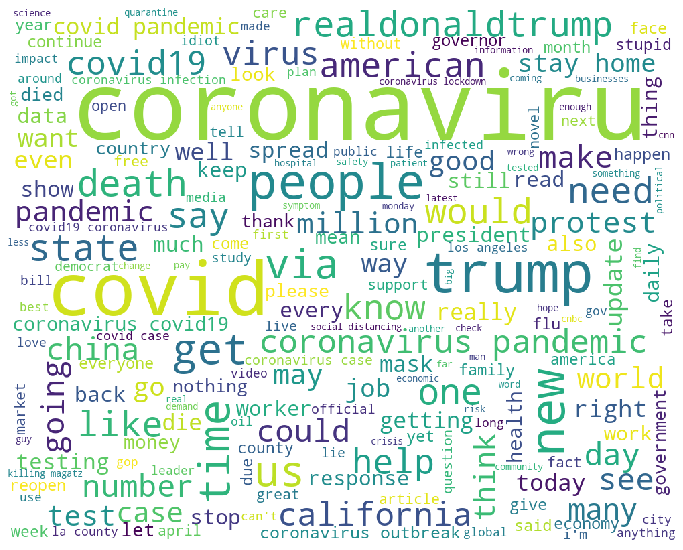

In [186]:
plt.figure(figsize=(12,10))
wordcloud = WordCloud(background_color='white',
                     width=1000, 
                     height=800, stopwords=stopword_list).generate(' '.join(cali))
plt.imshow(wordcloud)
plt.axis('off')
plt.show(wordcloud)

## Location is "New York"

In [193]:
file = 'nyc.csv'
# nyc = pd.read_csv(file, error_bad_lines=False)

In [191]:
nyc = nyc.tweet.apply(remove_url)

In [192]:
nyc

0       in this digital exclusive, chef josé andrés te...
1       i'm feeling sad and angry about the death of 5...
2       lawsuit sues china for six trillion dollars in...
3       staff on how to handle coronavirus emergencies...
4       fascinating counterpoint. so much data. so lit...
                              ...                        
3519    'we're completely overwhelmed' - mexico city h...
3520    watch live: president trump and the coronaviru...
3521    every time you hear trump, pence or birx bulls...
3522    more than 300 amazon warehouse workers at 50 f...
3523    france becomes fourth country with more than 2...
Name: tweet, Length: 3524, dtype: object

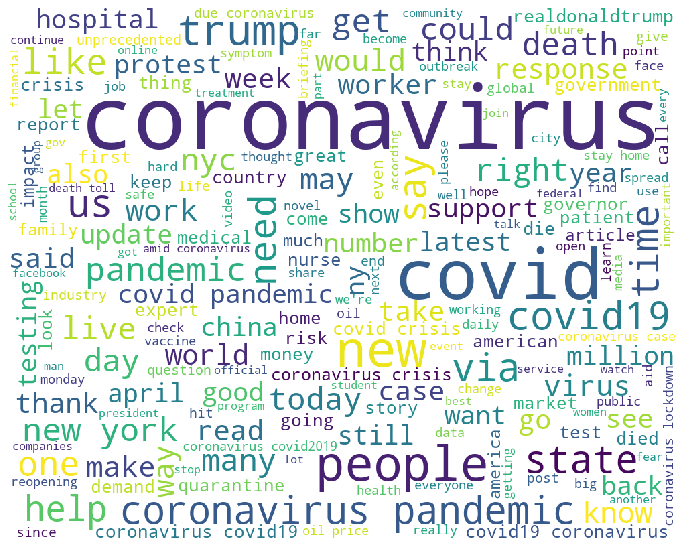

In [194]:
plt.figure(figsize=(12,10))
wordcloud = WordCloud(background_color='white',
                     width=1000, 
                     height=800, stopwords=stopword_list).generate(' '.join(nyc))
plt.imshow(wordcloud)
plt.axis('off')
plt.show(wordcloud)

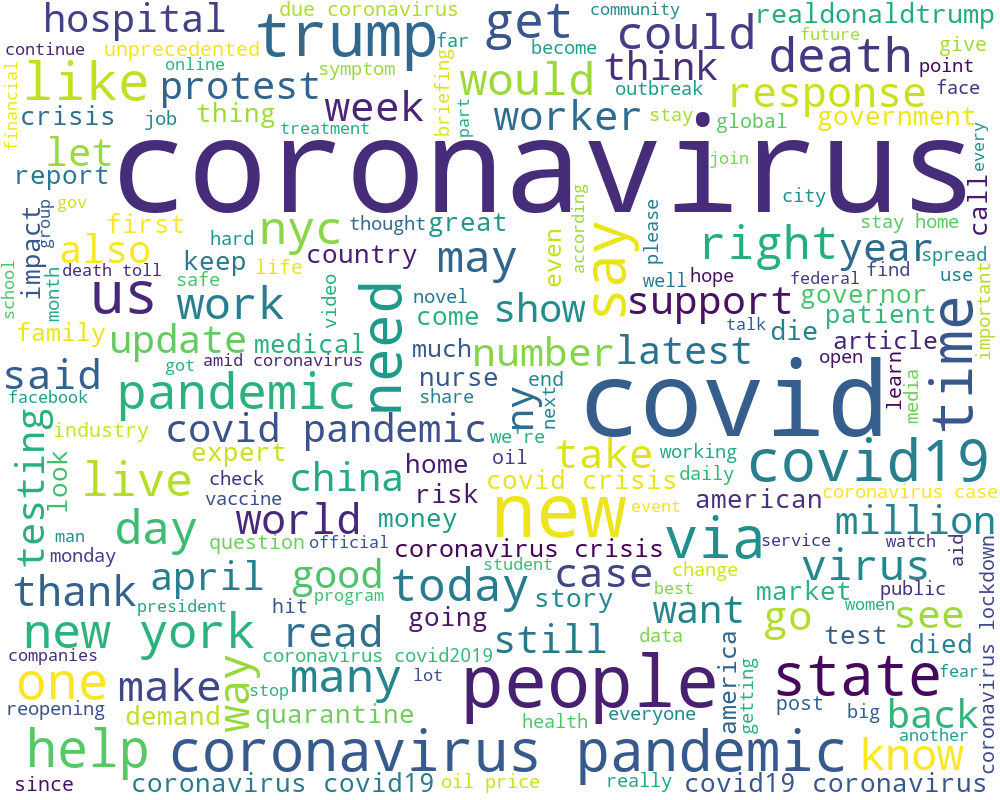

In [195]:
WordCloud.to_image(wordcloud)

## Location is "USA"

In [197]:
file = 'usa.csv'
# usa = pd.read_csv(file, error_bad_lines=False)

In [198]:
usa = usa.tweet.apply(remove_url)

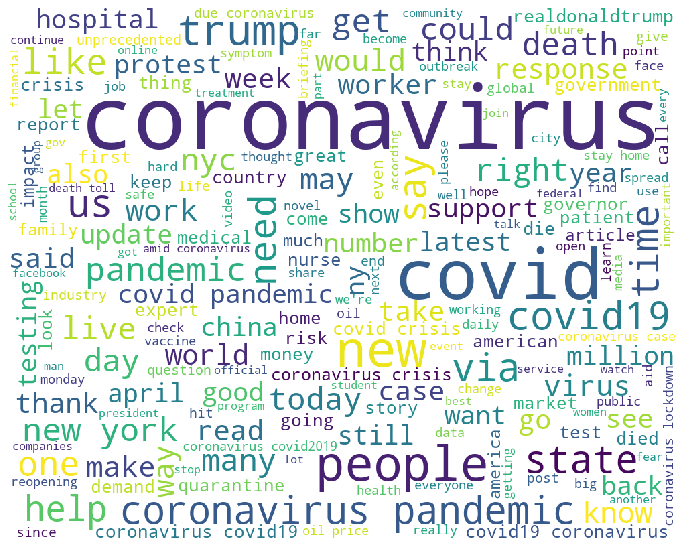

In [199]:
plt.figure(figsize=(12,10))
usa_wordcloud = WordCloud(background_color='white',
                     width=1000, 
                     height=800, stopwords=stopword_list).generate(' '.join(usa))
plt.imshow(wordcloud)
plt.axis('off')
plt.show(wordcloud)

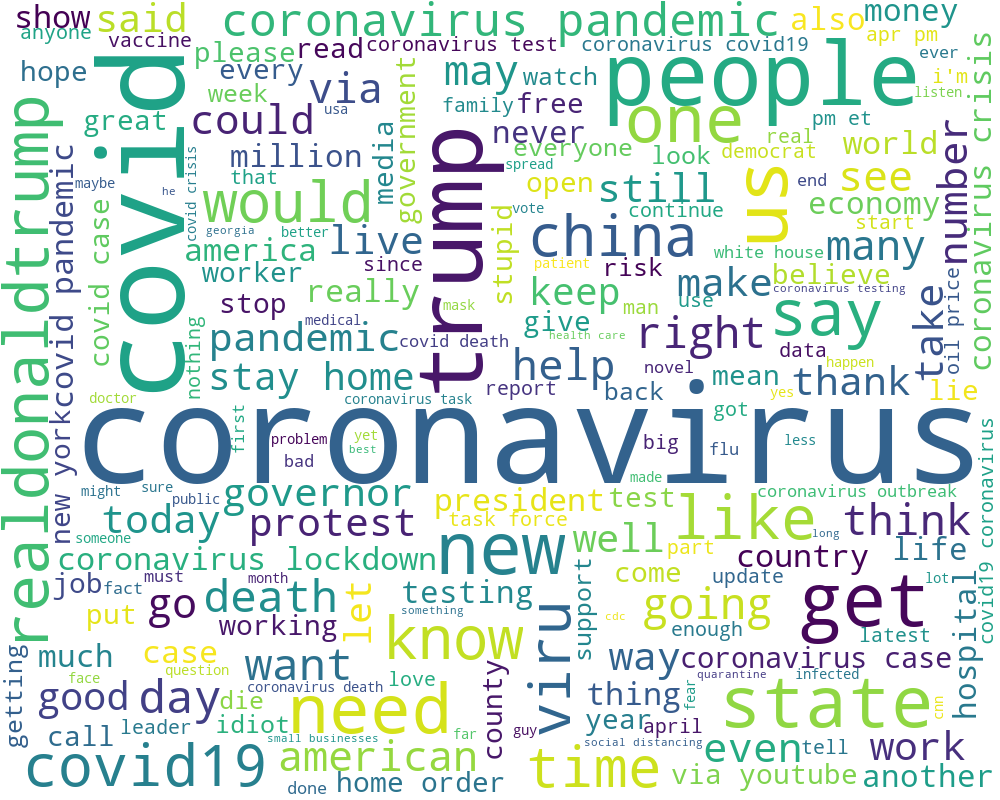

In [200]:
WordCloud.to_image(usa_wordcloud)

In [204]:
WordCloud.to_file(usa_wordcloud, 'usa_wordcloud.jpg')